In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df_inicial=pd.read_csv("C:/Users/Pichau/Desktop/TOTALISOTOTOTALISODONTO/df_inicial.csv")
df_inicial.head(5)

,NOME,TELEFONE,UNIDADE,DENTISTA,data_e_hora,MARCADO NO DIA,COMPARECEU OU NÃO,QUEM AGENDOU,data_hora_formatada,turno
0,Francisco José Almeida da costa,85 8187-7894,Aldeota,Italo Castelo,21/02 ás 13:20,19/02/2025,NÃO COMPARECEU,Manu,2025-02-21,Tarde
1,Claudiane Gomes da Silva,85 9816-0772,Maracanaú,Francisco Robério,27/03 ás 09:00,14/03/2025,NÃO COMPARECEU,Manu,2025-03-27,Manhã
2,SANDRO SOARES DE SOUZA,85 8168-0048,Bezerra,Italo Castelo,31/03 ás 18:00,26/03/2025,NÃO COMPARECEU,Manu,2025-03-31,Noite
3,Suyanne Magalhães Paiva,85 8854-1408,Parangaba,José Irisvaldo,07/04 ás 18:30,26/03/2025,NÃO COMPARECEU,Manu,2025-04-07,Noite
4,EMANUEL DE SOUZA BATISTA,5585987619153,Messejana,Marcia,28/03 ás 09:05,26/06/2025,COMPARECEU,Natan,2025-03-28,Manhã


### QUANTIDADE DE AGENDAMENTOS POR CLÍNICA

In [3]:
df_inicial['UNIDADE'].value_counts().head(7)

UNIDADE
Parangaba         105
Bezerra            73
Aldeota            62
Messejana          58
Centro             28
Maracanaú          23
Conjunto Ceará     12
Name: count, dtype: int64

### tabela de comparecimento dentistas

In [4]:
df_comparecimento=pd.read_csv("C:/Users/Pichau/Desktop/TOTALISOTOTOTALISODONTO/tabela comparecimento.csv")
df_comparecimento.head(10)

,DENTISTA,Aldeota,Bezerra,Bezerra De Menezes,Centro,Conjunto Ceará,Maracanaú,Messejana,Parangaba,Total
0,Italo Castelo,4,12,1,1,0,0,0,1,19
1,Monatha,2,3,0,0,0,0,0,6,11
2,Gabriela,1,1,0,0,0,0,0,6,8
3,Joana,0,0,0,7,0,0,0,0,7
4,Leticia,1,0,0,0,0,2,4,0,7
5,Carlos Veras,0,0,0,0,0,0,1,2,3
6,Allyne Fontenele,2,0,0,1,0,0,0,0,3
7,Carollyne,0,0,0,0,2,1,0,0,3
8,Laura Rodrigues,0,1,0,0,1,1,0,0,3
9,Lilian Cibele,0,1,0,0,1,1,0,0,3


In [5]:
top_dentistas = df_comparecimento.head(10)
cores = ["#FF5733", "#33FF57", "#3357FF", "#F1C40F", "cyan", "#E74C3C", "#2ECC71", "#3498DB", "#9B59B6"]

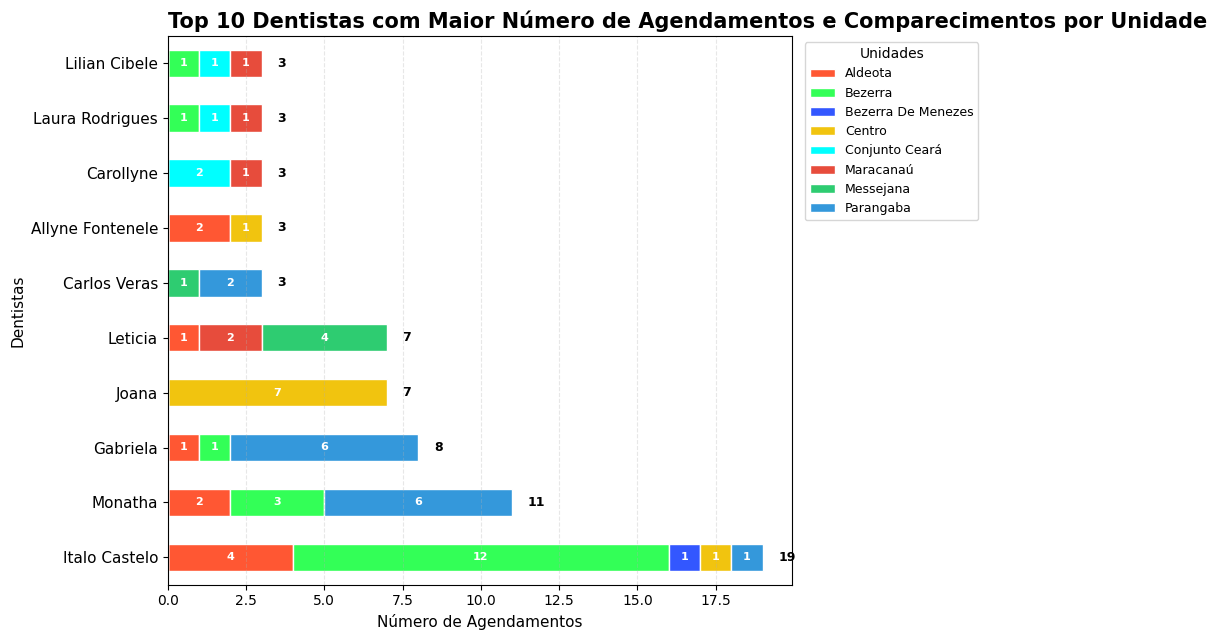

In [6]:
import matplotlib.pyplot as plt

top_dentistas = df_comparecimento.head(10)
cores = ["#FF5733", "#33FF57", "#3357FF", "#F1C40F", "cyan", "#E74C3C", "#2ECC71", "#3498DB"]

top_dentistas_sem_total = top_dentistas.drop(columns=["DENTISTA", "Total"])

fig, ax = plt.subplots(figsize=(10, 6.5))
top_dentistas_sem_total.plot(
    kind="barh",
    stacked=True,
    color=cores[:len(top_dentistas_sem_total.columns)],
    ax=ax,
    edgecolor='white'
)

ax.set_title("Top 10 Dentistas com Maior Número de Agendamentos e Comparecimentos por Unidade", fontsize=15, loc='left', weight="bold")
ax.set_xlabel("Número de Agendamentos", fontsize=11)
ax.set_ylabel("Dentistas", fontsize=11)

ax.set_yticks(range(len(top_dentistas)))
ax.set_yticklabels(top_dentistas["DENTISTA"], fontsize=11)

ax.xaxis.set_tick_params(labelsize=10)
ax.set_facecolor("white")
ax.grid(axis='x', linestyle='--', alpha=0.3)

for container in ax.containers:
    labels = [int(v) if v > 0 else "" for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type="center", fontsize=8, color="white", fontweight="bold")

for i, total in enumerate(top_dentistas["Total"]):
    ax.text(
        total + 0.5, i, str(int(total)),
        va="center", ha="left", fontsize=9, fontweight="bold", color="black"
    )

ax.legend(
    title="Unidades",
    bbox_to_anchor=(1.01, 1),
    loc='upper left',
    fontsize=9,
    title_fontsize=10
)

plt.tight_layout()
plt.show()


### DENTISTAS COM MENOS COMPARECIMENTOS

In [7]:
df_faltas = pd.read_csv('tabela faltas.csv', index_col=0)
df_faltas

,Aldeota,Bezerra,Centro,Conjunto Ceará,Maracanaú,Messejana,Parangaba,Total
DENTISTA,,,,,,,,
Italo Castelo,10,13,2,0,0,0,12,37
Monatha,5,0,0,0,0,0,14,19
Gabriela,1,0,0,0,0,0,9,10
Allyne Fontenele,1,0,4,1,0,2,0,8
Marina,0,0,0,0,0,6,0,6
Jessey,0,0,0,0,0,5,0,5
Lilian Cibele,0,3,0,0,1,0,1,5
Carlos Antonio Veraz,0,0,0,2,0,0,2,4
Carlos Eduardo,0,1,0,0,0,1,2,4


In [8]:
top_dentistas_faltas=df_faltas

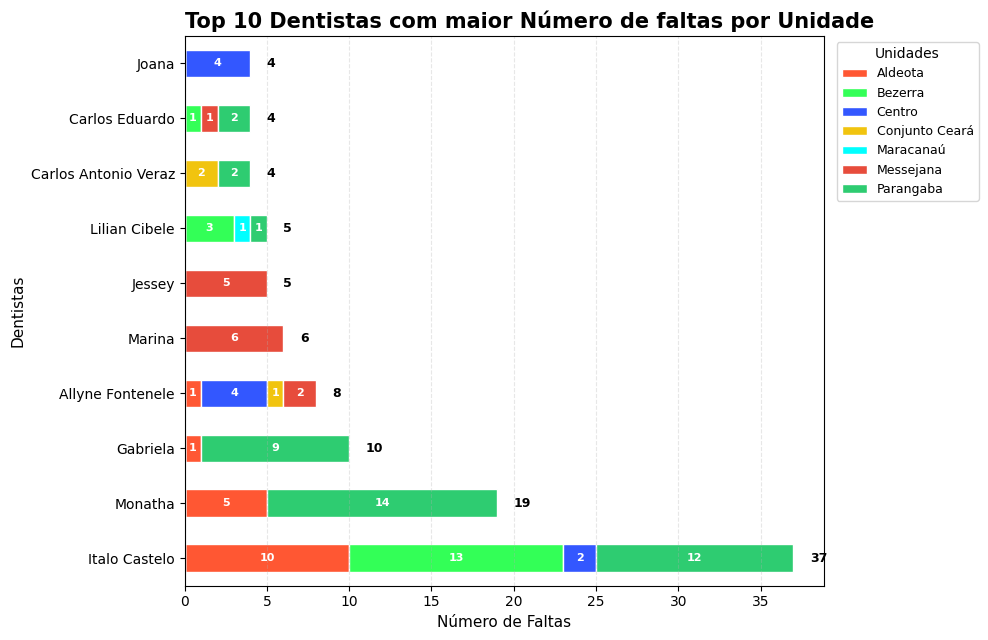

In [9]:
cores = ["#FF5733", "#33FF57", "#3357FF", "#F1C40F", "cyan", "#E74C3C", "#2ECC71", "#3498DB", "#9B59B6"]

top_dentistas_faltas_sem_total = top_dentistas_faltas.drop(columns="Total").copy()
top_dentistas_faltas_sem_total.index = top_dentistas_faltas.index  # garantir índice correto

fig, ax = plt.subplots(figsize=(10, 6.5))

top_dentistas_faltas_sem_total.plot(
    kind="barh",
    stacked=True,
    color=cores[:len(top_dentistas_faltas_sem_total.columns)],
    ax=ax,
    edgecolor="white"
)

ax.set_title("Top 10 Dentistas com maior Número de faltas por Unidade", fontsize=15, loc='left', weight="bold")
ax.set_xlabel("Número de Faltas", fontsize=11)
ax.set_ylabel("Dentistas", fontsize=11)


ax.xaxis.set_tick_params(labelsize=10)
ax.set_facecolor("white")
ax.grid(axis='x', linestyle='--', alpha=0.3)

for container in ax.containers:
    labels = [int(v) if v > 0 else "" for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type="center", fontsize=8,
                 color="white", fontweight="bold")

for i, total in enumerate(top_dentistas_faltas["Total"]):
    ax.text(
        total + 1, i, str(int(total)),
        va="center", ha="left", fontsize=9, fontweight="bold", color="black"
    )

# Legenda lateral
ax.legend(
    title="Unidades",
    bbox_to_anchor=(1.01, 1),
    loc='upper left',
    fontsize=9,
    title_fontsize=10
)

plt.tight_layout()
plt.show()


### DESCOBRINDO A QUANTIDADE DE COMPARECIMENTOS POR TURNO

In [10]:

compareceu = df_inicial[df_inicial["COMPARECEU OU NÃO"] == "COMPARECEU"]

In [11]:
comparecimento_por_turno=compareceu.groupby(["DENTISTA", "UNIDADE","turno"]).size().reset_index()
tabela_comparecimento = pd.pivot_table(
    comparecimento_por_turno,
    index=['DENTISTA', 'UNIDADE'],
    columns='turno',
    values=0, 
    aggfunc='sum',
    fill_value=0
)

tabela_comparecimento["Total"] = tabela_comparecimento.sum(axis=1)
tabela_comparecimento = tabela_comparecimento.sort_values(by="Total", ascending=False)



In [12]:
print("-"*50)
print("Total de comparecimentos por turno:")
print("Comparecimentos no turno da Manhã:",tabela_comparecimento["Manhã"].sum())
print("Comparecimentos no turno da Tarde:",tabela_comparecimento["Tarde"].sum()) 
print("Comparecimentos no turno da Noite:",tabela_comparecimento["Noite"].sum())
print("-"*50)

--------------------------------------------------
Total de comparecimentos por turno:
Comparecimentos no turno da Manhã: 39
Comparecimentos no turno da Tarde: 49
Comparecimentos no turno da Noite: 19
--------------------------------------------------


### TABELA DE VENDAS

In [13]:
df_vendas=pd.read_csv("C:/Users/Pichau/Desktop/TOTALISOTOTOTALISODONTO/tabela_vendas_particulares.csv")
df_vendas.head()

,NOME E ID,TELEFONE,UNIDADE,DENTISTA,VALOR,PORCENTAGEM,PROCEDIMENTO,DATA E HORA,Total,QUEM AGENDOU,TOTAL
0,5047040-ERICA DA SILVA VASCONCELOS,85989946630,Maracanaú,Leticia,1500.0,"1,00%",PRÓTESE FLEX,28/03 ÁS 08:20,"R$ 15,00",Manu,15.00
1,5058415-Mateus Cruz Soares,85981508303,Messejana,Marina,80.0,1%,Contrato - Orto,31/03 ás 10:00,"R$ 0,80",Natan,0.80
2,4664590 - GEICIANE NASCIMENTO,85988667658,Bezerra,Maria Do Socorro,240.0,"1,00%",LIMPEZA II,29/03 ás 10:10,"R$ 2,40",Natan,2.40
3,5058469 - MARIA ISABEL DE SOUSA BRITO,85996877120,Bezerra,Vanilde Belo Aragão,125.0,1%,Manutenção ortodontico,31/03/2025 14:20,"R$ 1,25",Stephanie,1.25
4,5058690 - TALITA PINHEIRO VITORINO,85988806704,Messejana,Carlos Eduardo,200.0,"1,00%",EXODONTIA,01/04 ÁS 17:30,"R$ 2,00",Manu,2.00


### IREMOS REALIZAR UMA PEQUENA LIMPEZA NOS DADOS

In [14]:
def limpar_valor(valor):
    if isinstance(valor, str):
        valor = valor.replace("R$", "").replace(".", "").replace(",", ".").strip()
    return float(valor)

df_vendas[" VALOR "] = df_vendas[" VALOR "].apply(limpar_valor)
df_vendas["TOTAL"] = df_vendas["Total"].apply(limpar_valor)



### QUANTIDADE DE FECHAMENTO POR DENTISTAS

In [15]:
df_vendas["DENTISTA"].value_counts().sort_values(ascending=False)

DENTISTA
Leticia                7
Gabriela               5
Joana                  5
Italo Castelo          4
Silvio                 4
Ana Mylena             3
Jessey                 3
Allyne Fontenele       3
Monatha                3
Lilian Cibele          3
Laura Rodrigues        2
Carlos Eduardo         2
Carollyne              2
Tales                  2
Lennilton              2
Carlos Veras           2
Maria Do Socorro       1
Marina                 1
Maritza                1
Vanilde Belo Aragão    1
Cassio                 1
Erica                  1
Zeuderi                1
Zeulier                1
Julio                  1
Thais Carolina         1
Flavia                 1
Fabio                  1
Name: count, dtype: int64

### IREMOS VERIFICAR AS VENDAS DO DR.ITALO

In [16]:
df_vendas.loc[df_vendas["DENTISTA"]=="Italo Castelo"]

,NOME E ID,TELEFONE,UNIDADE,DENTISTA,VALOR,PORCENTAGEM,PROCEDIMENTO,DATA E HORA,Total,QUEM AGENDOU,TOTAL
12,5022912 - ROSA DOMICILIA MOREIRA ARAGAO DE LIMA,85999924974,Aldeota,Italo Castelo,240.0,"1,00%",MANUTENÇÃO DE PRÓTESE,05/04 ÁS 10:05,"R$ 2,40",Manu,2.4
16,5060705-MARIA IOLINDA CARDOSO COSTA,85989407212,Bezerra,Italo Castelo,1500.0,"1,00%",IMPLANTE ESPECIAL UD 37,12/04 ÁS 08:20,"R$ 15,00",Manu,15.0
36,5062510-MARIO GLADSTON DA SILVA FIDELES,85994132328,Bezerra,Italo Castelo,260.0,"1,00%",MANUTENÇÃO IMPLANTE,10/05 ás 11:20,"R$ 2,60",Stephanie,2.6
43,4657298 - ELIDIANE LOURENCO DOS SANTOS,85)98929.3995,Bezerra,Italo Castelo,1500.0,"1,00%",IMPLANTE ESPECIAL UD 21,20/05 ás 09:00,"R$ 15,00",Natan,15.0


### VERIFICANDO AS VENDAS DA DRA.LETICIA

In [17]:
df_vendas.loc[df_vendas["DENTISTA"]=="Leticia"]

,NOME E ID,TELEFONE,UNIDADE,DENTISTA,VALOR,PORCENTAGEM,PROCEDIMENTO,DATA E HORA,Total,QUEM AGENDOU,TOTAL
0,5047040-ERICA DA SILVA VASCONCELOS,85989946630,Maracanaú,Leticia,1500.0,"1,00%",PRÓTESE FLEX,28/03 ÁS 08:20,"R$ 15,00",Manu,15.00
22,5060030 - CICERO RAPHAEL FEITOZA,34991122148,Maracanaú,Leticia,380.0,"1,00%",REMOÇÃO DE SISO,16/04 ÁS 17:00,"R$ 3,80",Stephanie,3.80
29,5047633 - PATRICIA COSTA FERNANDES,85996847248,Messejana,Leticia,1600.0,"1,00%",COROA TOTAL METALO CERÂMICA,17/05 ÁS 15;00,"R$ 16,00",Stephanie,16.00
35,5062887 - ALINE SILVA ALVES,85987736660,Messejana,Leticia,750.0,"1,00%",CLAREAMENTO DENTAL MISTO,08/05 ás 16:40,"R$ 7,50",Manu,7.50
41,5063490 - MARIA LENIR SANTOS DA SILVA,85987787899,Messejana,Leticia,1600.0,"1,00%",PRÓTESE PARCIAL REMOVÍVEL COM GRAMPOS BILATERAL,15/05 ás 15:20,"R$ 16,00",Manu,16.00
44,5053380-VALDOMIRA TINTINO DE OLIVEIRA,85996598037,Aldeota,Leticia,427.5,"1,00%",RECONSTRUÇÃO TIPO V UD 36,24/05 ás 09:20,"R$ 4,27",Manu,4.27
50,5063468-VINICIUS RIBEIRO RODRIGUES,85998300400,Messejana,Leticia,349.0,"1,00%",limpeza e restauração,15/05 ás 14;00,"R$ 3,49",Manu,3.49


### VERIFICANDO AS VENDAS DA DRA.MONATHA

In [18]:
df_vendas.loc[df_vendas["DENTISTA"]=="Monatha"]

,NOME E ID,TELEFONE,UNIDADE,DENTISTA,VALOR,PORCENTAGEM,PROCEDIMENTO,DATA E HORA,Total,QUEM AGENDOU,TOTAL
25,5061120-SILVA MARIA DE SOUSA OLIVEIRA,85987021567,Parangaba,Monatha,1725.0,"1,00%",PRÓTESE FLEX,25/04 ÁS 14:15,"R$ 17,65",Manu,17.65
34,5053699-ALICE DE PAIVA VIANA,85999162737,Parangaba,Monatha,770.0,"1,00%",PLACA DE MORDIDA MIORRELAXANTE,07/05 ás 18;00,"R$ 7,70",Manu,7.70
62,5066143-IGOR BARBOSA DA SILVA,85987556236,Parangaba,Monatha,115.0,"1,00%",RASPAGEM SUPRA-GENGIVA,13/06 ás 16:00,"R$ 1,15",Manu,1.15


### ANALISANDO O DF FINAL


In [19]:
df_final=pd.read_csv("C:/Users/Pichau/Desktop/TOTALISOTOTOTALISODONTO/df_final.csv")
df_final

,DENTISTA,Fechamentos,Total_Produzido,Agendamentos_comparecidos,Agendamentos_faltosos,Agendamentos_totais
0,Leticia,7,6606.5,7.0,3,10.0
1,Gabriela,5,4820.0,8.0,10,18.0
2,Italo Castelo,4,3500.0,19.0,37,56.0
3,Monatha,3,2610.0,11.0,19,30.0
4,Joana,5,1775.0,7.0,4,11.0
5,Lilian Cibele,3,1695.0,3.0,5,8.0
6,Allyne Fontenele,3,1480.0,3.0,8,11.0
7,Thais Carolina,1,1260.0,2.0,4,6.0
8,Lennilton,2,750.0,2.0,1,3.0
9,Carlos Eduardo,2,700.0,1.0,4,5.0


### VERIFICANDO VALOR DE VENDAS - POR FALTAS DE COMPARECIMENTO

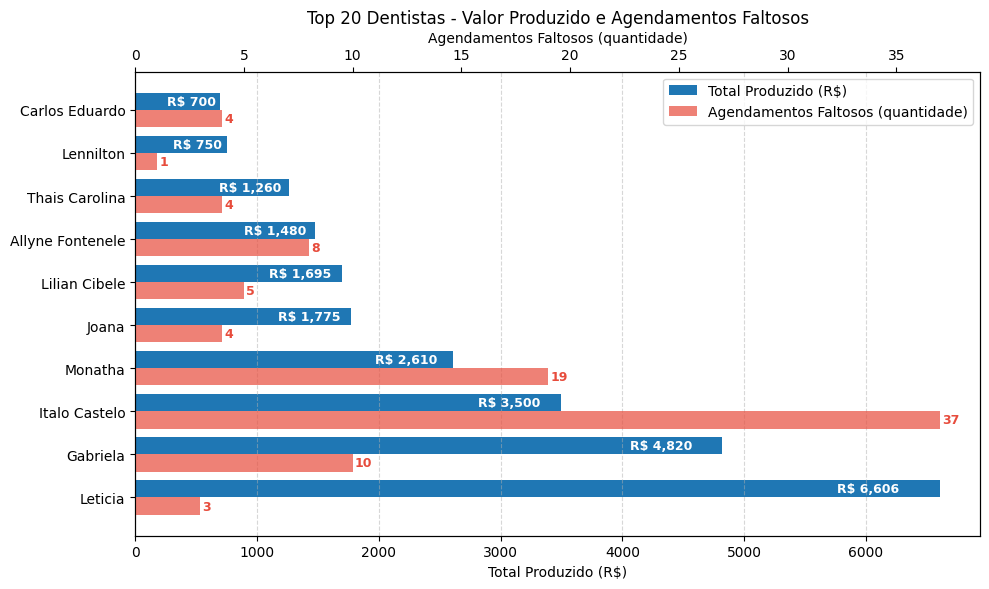

In [20]:
top20 = df_final.sort_values(by='Total_Produzido', ascending=False).head(10).copy()
top20 = top20[::-1] 
fig, ax1 = plt.subplots(figsize=(10, 6)) 

y_pos = np.arange(len(top20))

bar_width = 0.4

bars_valor = ax1.barh(y_pos - bar_width/2, top20['Total_Produzido'], height=bar_width, color='#1f77b4', label='Total Produzido (R$)')

ax1.set_xlabel('Total Produzido (R$)')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(top20['DENTISTA'])
ax1.invert_yaxis()
ax1.grid(axis='x', linestyle='--', alpha=0.5)
ax1.set_title('Top 20 Dentistas - Valor Produzido e Agendamentos Faltosos')

ax2 = ax1.twiny()

bars_faltosos = ax2.barh(y_pos + bar_width/2, top20['Agendamentos_faltosos'], height=bar_width, color='#e74c3c', alpha=0.7, label='Agendamentos Faltosos (quantidade)')

ax2.set_xlabel('Agendamentos Faltosos (quantidade)')

for bar in bars_valor:
    width = bar.get_width()
    ax1.text(width - width*0.05, bar.get_y() + bar.get_height()/2, f'R$ {width:,.0f}', va='center', ha='right', color='white', fontweight='bold', fontsize=9)

for bar in bars_faltosos:
    width = bar.get_width()
    if width > 0:
        ax2.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center', ha='left', color='#e74c3c', fontweight='bold', fontsize=9)


handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right', bbox_to_anchor=(1, 1), ncol=1)

plt.tight_layout()
plt.show()


## VAMOS VERIFICAR OS DENTISTAS COM MAIOR TAXA DE FECHAMENTO

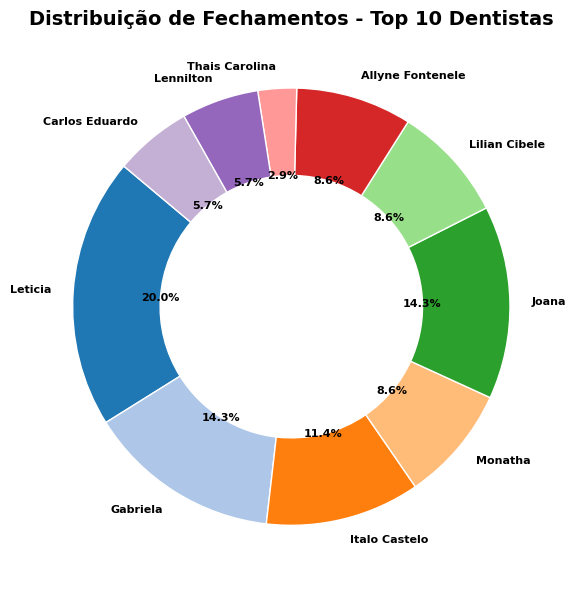

In [21]:
top10_fechamentos = df_final.head(10)
fig, ax = plt.subplots(figsize=(8, 6))
colors = plt.cm.tab20.colors

wedges, texts, autotexts = ax.pie(
    top10_fechamentos["Fechamentos"],
    labels=top10_fechamentos["DENTISTA"], 
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'width': 0.4, 'edgecolor': 'white'},
    textprops={'fontsize': 8, 'weight': 'bold', 'color': 'black'}
)

ax.set_title("Distribuição de Fechamentos - Top 10 Dentistas", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

### TAXA DE FECHAMENTO DE PROCEDIMENTOS INDIVIDUAIS

In [22]:

df_final["Taxa_Fechamento (%)"] = (df_final["Fechamentos"] / df_final["Agendamentos_totais"]) * 100
df_final["Taxa_Fechamento (%)"] = df_final["Taxa_Fechamento (%)"].round(1)

tabela_taxa = df_final.head(10)[["DENTISTA", "Fechamentos", "Agendamentos_totais", "Taxa_Fechamento (%)"]]
tabela_taxa

,DENTISTA,Fechamentos,Agendamentos_totais,Taxa_Fechamento (%)
0,Leticia,7,10.0,70.0
1,Gabriela,5,18.0,27.8
2,Italo Castelo,4,56.0,7.1
3,Monatha,3,30.0,10.0
4,Joana,5,11.0,45.5
5,Lilian Cibele,3,8.0,37.5
6,Allyne Fontenele,3,11.0,27.3
7,Thais Carolina,1,6.0,16.7
8,Lennilton,2,3.0,66.7
9,Carlos Eduardo,2,5.0,40.0


A Dra. Leticia vem chamando atenção de forma muito positiva. Recém-chegada à equipe, ela já mostrou a que veio: com apenas 10 agendamentos, conseguiu fechar 7 contratos, o que representa uma taxa de 70% de fechamento — a mais alta entre todos os dentistas avaliados.

Mas não é só a taxa que impressiona: o valor total produzido por Leticia já soma mais de R$ 6.600,00, colocando-a no topo do ranking, mesmo à frente de profissionais com mais experiência e volume de atendimentos. E o mais interessante é o perfil dessas vendas: ela já realizou fechamentos de alto valor envolvendo próteses flexíveis, coroas metalocerâmicas, clareamento dental e até procedimentos clínicos, como remoção de siso e reconstrução dentária.

Esse mix de procedimentos mostra que Leticia não está limitada a uma área específica — ela transita entre a odontologia estética, clínica e reabilitadora com muita desenvoltura. Em pouco tempo, ela se tornou uma profissional que inspira confiança nos pacientes e gera resultados expressivos para a clínica.

Enquanto isso, outros nomes importantes da equipe estética, como Gabriela, Joana, Lilian Cibele e Allyne Fontenele, também vêm contribuindo, mas com uma performance ainda oscilante, especialmente em relação à taxa de conversão — todas abaixo de 50%.

Leticia, por outro lado, tem se destacado justamente pelo equilíbrio: alta conversão, variedade de serviços e valor agregado em cada venda. Diante desse cenário, é seguro dizer que ela tem potencial para ser uma das grandes apostas da empresa neste novo ciclo.



In [23]:
df_vendas.columns = df_vendas.columns.str.strip()  #das colunas
df_vendas["VALOR"] = pd.to_numeric(df_vendas["VALOR"], errors="coerce")

lucro_por_unidade = (
    df_vendas.groupby("UNIDADE")["VALOR"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
lucro_por_unidade.columns = ["UNIDADE", "Lucro Total (R$)"]
lucro_por_unidade


,UNIDADE,Lucro Total (R$)
0,Parangaba,8280.0
1,Bezerra,6300.0
2,Messejana,6259.0
3,Centro,3155.0
4,Maracanaú,2595.0
5,Aldeota,2225.5
6,Conjunto Ceará,965.0


A Parangaba está mandando muito bem, puxando a fila com um lucro total de R$ 8.280. Dá pra ver que lá o movimento está forte e os resultados aparecem no caixa.

Em seguida, as unidades de Bezerra e Messejana estão quase no mesmo patamar, com algo em torno de R$ 6.300 cada uma. Isso mostra que elas também estão indo muito bem, com bastante atendimento e bons resultados.

Depois vem o Centro, com pouco mais de R$ 3.000, e a Maracanaú, que fatura uns R$ 2.600. Essas unidades ainda têm espaço para crescer, mas já têm uma boa base de clientes.

Por fim, as clínicas de Aldeota e Conjunto Ceará aparecem com números menores, principalmente o Conjunto Ceará, que está com menos de mil reais de lucro. Isso indica que talvez seja hora de pensar em estratégias para atrair mais pacientes por lá.

No geral, a gente consegue ver claramente onde as coisas estão andando bem e onde dá pra investir um pouco mais para melhorar.

C:\Users\Pichau\AppData\Local\Temp\ipykernel_27560\1631143293.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


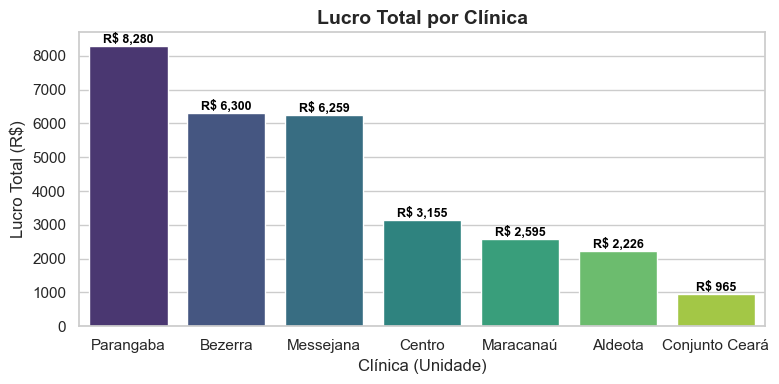

In [24]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 4))
barplot = sns.barplot(
    data=lucro_por_unidade,
    x="UNIDADE",
    y="Lucro Total (R$)",
    palette="viridis"
)

plt.title("Lucro Total por Clínica", fontsize=14, weight="bold")
plt.xlabel("Clínica (Unidade)", fontsize=12)
plt.ylabel("Lucro Total (R$)", fontsize=12)

plt.xticks(rotation=0, ha="center") 

for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'R$ {height:,.0f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color='black', weight='bold')

plt.tight_layout()
plt.show()


In [25]:

df_vendas.columns = df_vendas.columns.str.strip()

df_vendas["VALOR"] = pd.to_numeric(df_vendas["VALOR"], errors="coerce")

lucro_por_dentista_unidade = (
    df_vendas.groupby(["UNIDADE", "DENTISTA"])["VALOR"]
    .sum()
    .reset_index()
)

idx = lucro_por_dentista_unidade.groupby("UNIDADE")["VALOR"].idxmax()
top_dentistas_por_unidade = lucro_por_dentista_unidade.loc[idx].reset_index(drop=True)

top_dentistas_por_unidade.columns = ["UNIDADE", "DENTISTA", "Lucro Total (R$)"]

top_dentistas_por_unidade


,UNIDADE,DENTISTA,Lucro Total (R$)
0,Aldeota,Thais Carolina,1260.0
1,Bezerra,Italo Castelo,3260.0
2,Centro,Joana,1775.0
3,Conjunto Ceará,Lilian Cibele,365.0
4,Maracanaú,Leticia,1880.0
5,Messejana,Leticia,4299.0
6,Parangaba,Gabriela,4695.0


C:\Users\Pichau\AppData\Local\Temp\ipykernel_27560\4079793569.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


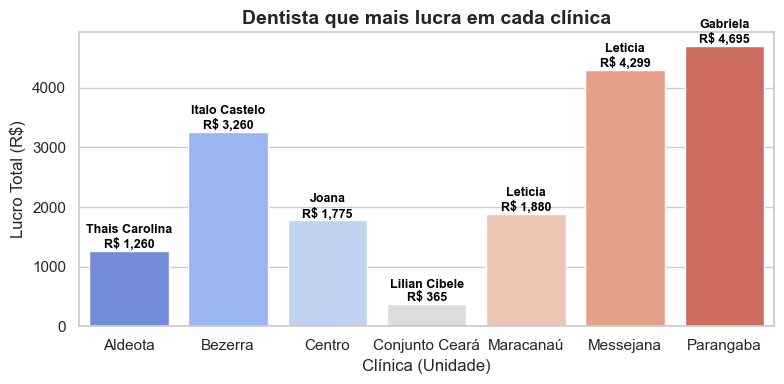

In [ ]:
+-

Agora, falando da Letícia, que é destaque em duas unidades, ela merece um destaque especial: em Maracanaú, Letícia acumulou R$ 1.880 de lucro, e em Messejana ela realmente se destacou, com incríveis R$ 4.299! Isso mostra que ela tem uma clientela fiel e sabe como transformar atendimentos em resultados reais para as clínicas.

em Parangaba, a Gabriela lidera com R$ 4.695, mostrando que é uma das profissionais que mais geram valor por lá, contribuindo muito para o sucesso da unidade.